<a href="https://colab.research.google.com/github/Neissandy/AprendizagemMaquina_atv003/blob/master/Atividade_semana_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de dados de doenças cardiovasculares**

Link do dataset GitHub: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Exercício baseado no passo a passo da aula prática 02/09. As análises e interpretações dos resultados obtidos estão descritos ao decorrer da atividade.

O Dataset foi reduzido de 70000 para 10000 instâncias. Essa modificação foi realizada com o objetivo de reduzir o tempo de execução dos códigos, ou seja, apenas para realização da atividade. 


**Recursos**:
1. Idade | Recurso objetivo | idade | int (dias)
2. Gênero | Recurso objetivo | gênero | código categórico |
3. Altura | Recurso objetivo | altura | int (cm) |
4. Peso | Recurso objetivo | peso | flutuador (kg) |

5. Pressão arterial sistólica | Recurso de exame | ap_hi | int |
6. Pressão arterial diastólica | Recurso de exame | ap_lo | int |
7. Colesterol | Recurso de exame | colesterol | 1: normal, 2: acima do normal, 3: muito acima do normal |
8. Glicose | Recurso de exame | gluc | 1: normal, 2: acima do normal, 3: muito acima do normal |
9. Fumar | Característica subjetiva | fumaça | binário |
10. Ingestão de álcool | Característica subjetiva | alco | binário |
11. Atividade física | Característica subjetiva | ativo | binário |
12. Presença ou ausência de doença cardiovascular | Variável de destino | cardio | binário |

**Objetivo:** Pacientes que apresentam ou não doença cardiovascular.

# **Classificação com Redes Neurais**


# 1. Importando bibliotecas necessárias

In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as npS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score


# 2. Preparando Dados

In [ ]:
#Lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/cardio_trainTESTE1.csv')
dados.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#Verificando quantidade de linhas e colunas de toda a base de dados
dados.shape

(9999, 13)

In [ ]:
#verificando colunas dos dados
dados.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# 3. Iniciando limpeza de dados

In [ ]:
#Verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [ ]:
#Excluir colunas irrelevantes
dados = dados.drop(columns=['id'])

In [ ]:
dados.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 4. Análise preliminar dos dados

Na atividade anterior, essa etapa não foi realizada. Além disso, a acurácia da árvore de decisão com e sem Random Forest foi baixa. Diante desses dois fatos, a análise preliminar dos dados de pacientes com doença cardiovascular será realizado. 

In [ ]:
#Verificando quantos pacientes tem alguma doença cardiovascular
print('chance de doença cardíaca:',dados[dados['cardio']==1].shape[0])
print('sem chance de doença cardíaca:',dados[dados['cardio']==0].shape[0])

chance de doença cardíaca: 5030
sem chance de doença cardíaca: 4969


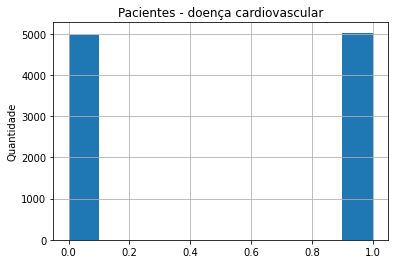

In [ ]:
#Verificando pacientes com ou sem doença cardiovascular
plt.hist(dados['cardio'])
plt.ylabel('Quantidade')
plt.title('Pacientes - doença cardiovascular')
plt.grid(True)
plt.show()

**ANÁLISE**: O histograma mostra que os dados referentes aos pacientes com ou sem doença cardiovascular estão bem distribuidos.

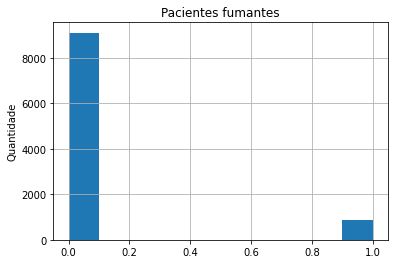

In [ ]:
#Verificando pacientes que são fumantes
plt.hist(dados['smoke'])
plt.ylabel('Quantidade')
plt.title('Pacientes fumantes')
plt.grid(True)
plt.show()

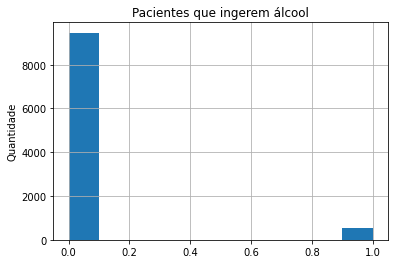

In [ ]:
#Verificando pacientes que ingerem álcool
plt.hist(dados['alco'])
plt.ylabel('Quantidade')
plt.title('Pacientes que ingerem álcool')
plt.grid(True)
plt.show()

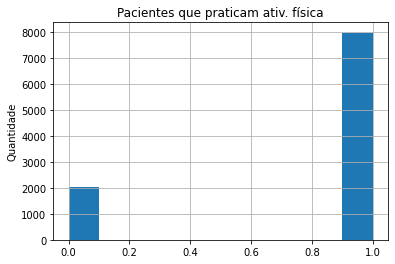

In [ ]:
#Verificando pacientes que praticam atividade física
plt.hist(dados['active'])
plt.ylabel('Quantidade')
plt.title('Pacientes que praticam ativ. física')
plt.grid(True)
plt.show()

**ANÁLISE**: Maior parte dos pacientes não são fumantes, não ingerem bebida alcoólica e praticam atividades físicas.

In [ ]:
#Criando dataframe apenas para pacientes com doenças cardiovasculares, representado pela sigla DC
DC = dados[dados['cardio']==1].drop(columns=['cardio']).reset_index(drop=True)

In [ ]:
#Criando dataframe apenas para pacientes sem doenças cardiovasculares, representado pela sigla NDC
NDC = dados[dados['cardio']==0].drop(columns=['cardio']).reset_index(drop=True)

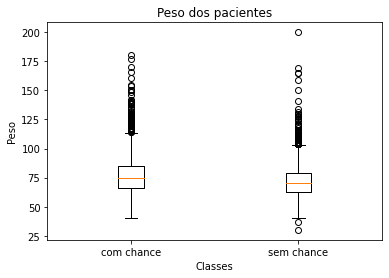

In [ ]:
#Box plot comparando o peso para as duas classes
plt.boxplot([DC.weight,NDC.weight],labels=['com chance','sem chance'])
plt.xlabel('Classes')
plt.ylabel('Peso')
plt.title('Peso dos pacientes')
plt.show()

**ANÁLISE**: A faixa de peso de pacientes com ou sem doença cardiovascular é bastante semelhante. Entretanto, existe uma quantidade um pouco maior de dados discrepantes para os pacientes com a doença.

In [ ]:
#Estatística básica dos dados - calculo da média para pacientes sem doença cardiovascular
NDC.mean()

age            18855.346951
gender             1.344335
height           164.376937
weight            71.616865
ap_hi            119.655866
ap_lo             81.890722
cholesterol        1.214128
gluc               1.175287
smoke              0.094184
alco               0.055142
active             0.813041
dtype: float64

In [ ]:
#Estatística básica dos dados - calculo da média para pacientes com doença cardiovascular
DC.mean()

age            20036.074553
gender             1.346322
height           164.240557
weight            76.959225
ap_hi            136.314115
ap_lo            113.824254
cholesterol        1.514115
gluc               1.268588
smoke              0.083897
alco               0.052286
active             0.781511
dtype: float64

In [ ]:
#Calculando a correlação entre todos os atributos e o atributo de classe
for col in dados.columns[1:]:
    print(col,': ',round(dados.cardio.corr(dados[col]),2))

gender :  0.0
height :  -0.01
weight :  0.18
ap_hi :  0.07
ap_lo :  0.08
cholesterol :  0.22
gluc :  0.08
smoke :  -0.02
alco :  -0.01
active :  -0.04
cardio :  1.0


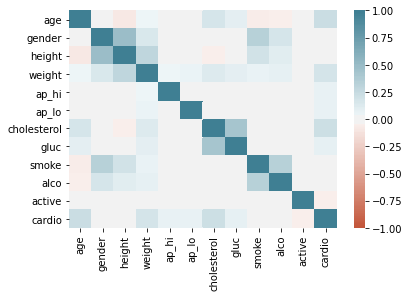

In [ ]:
#Plotando coeficientes de correlação em um mapa de calor
sns.heatmap(dados.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200))

**ANÁLISE**: Diante de todas as observações preliminares realizadas nesse dataset, pode concluir que os dados praticamente não apresentam uma correlação, tornando-se difícil predizer quais pacientes possuem ou não a doença. é possível notar isso através do mapa de calor acima.

# 5. Realizando re-escala

In [ ]:
#Re-escala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())

In [ ]:
dados.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.587477,1.0,0.544444,0.188235,0.018103,0.008,0.0,0.0,0.0,0.0,1.0,0.0
1,0.730926,0.0,0.477778,0.323529,0.020690,0.009,1.0,0.0,0.0,0.0,1.0,1.0
2,0.623749,0.0,0.527778,0.200000,0.019828,0.007,1.0,0.0,0.0,0.0,0.0,1.0
3,0.527283,1.0,0.550000,0.305882,0.021552,0.010,0.0,0.0,0.0,0.0,1.0,1.0
4,0.515635,0.0,0.477778,0.152941,0.017241,0.006,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Organizando dados para modelagem

In [ ]:
#Dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:11]
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.587477,1.0,0.544444,0.188235,0.018103,0.008,0.0,0.0,0.0,0.0,1.0
1,0.730926,0.0,0.477778,0.323529,0.020690,0.009,1.0,0.0,0.0,0.0,1.0
2,0.623749,0.0,0.527778,0.200000,0.019828,0.007,1.0,0.0,0.0,0.0,0.0
3,0.527283,1.0,0.550000,0.305882,0.021552,0.010,0.0,0.0,0.0,0.0,1.0
4,0.515635,0.0,0.477778,0.152941,0.017241,0.006,0.0,0.0,0.0,0.0,0.0


In [ ]:

y = dados.cardio
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: cardio, dtype: float64

In [ ]:
#Definindo 20% dos dados para teste e 80% para treino.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
#Executando x_train
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
2439,0.690275,0.0,0.511111,0.117647,0.019828,0.009,1.0,0.0,0.0,0.0,1.0
2342,0.855691,0.0,0.472222,0.211765,0.022414,0.009,0.5,0.0,0.0,0.0,1.0
8301,0.350453,0.0,0.527778,0.235294,0.018103,0.007,0.0,0.0,0.0,0.0,1.0
1816,0.528299,1.0,0.483333,0.129412,0.021552,0.010,0.0,0.0,1.0,0.0,1.0
4898,0.979987,1.0,0.555556,0.352941,0.020690,0.009,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Executando y_train
y_train.head()

2439    1.0
2342    1.0
8301    0.0
1816    1.0
4898    1.0
Name: cardio, dtype: float64

# 7. Otimização de Parâmetros

Utilizando a otimização de parâmetros, a modelagem escolhida será com Grid Search, pois demonstra resultados mais precisos. 

#Modelagem com Grid Search




In [ ]:
#Definindo parâmetros 
param_grid = [
              {
                  'hidden_layer_sizes': [(10),(50),(50,10)],
                  'activation': ['identity', 'logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'sgd', 'adam'],
                  'max_iter': [2000]
              }
              
]

In [ ]:
#Definindo classificador
classificador = GridSearchCV(MLPClassifier(),param_grid,cv=5,scoring='accuracy')

In [ ]:
#Treinando modelo
classificador.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'activation': [

In [ ]:
#Mostrando combinação de parâmetros que apresentaram melhor acurácia
print(classificador.best_params_)

{'activation': 'logistic', 'hidden_layer_sizes': (50, 10), 'max_iter': 2000, 'solver': 'lbfgs'}


In [ ]:
#Mostrando acurácia do classificador
print(classificador.best_score_)

0.7240718859429714


In [ ]:
# Mostrando resultados
classificador.cv_results_

{'mean_fit_time': array([ 0.58577638,  1.62461214,  1.59066048,  1.30065899,  3.36737633,
         2.95395217,  1.5024272 ,  2.4845479 ,  3.46251535, 13.64809055,
         0.26716332,  2.13621984, 42.71228986,  4.02794347,  4.63519893,
        61.15456891,  0.53871894,  4.63884501, 16.46575589,  2.2590579 ,
         2.52728972, 48.67658501,  5.93786135,  9.20975804, 77.02675719,
         5.38542562,  8.33322587,  3.51026731,  2.7154635 ,  2.57120705,
        16.15824809,  5.7956182 , 15.21145196, 26.64009137,  4.97714839,
        10.81486177]),
 'mean_score_time': array([0.00232458, 0.00228553, 0.00286031, 0.00269384, 0.00269709,
        0.00273957, 0.00300117, 0.0029037 , 0.00293913, 0.00295067,
        0.00297213, 0.00374947, 0.00596895, 0.00591679, 0.00610948,
        0.00692377, 0.00702591, 0.00685983, 0.00328522, 0.00313349,
        0.00311422, 0.00781584, 0.00633702, 0.00658236, 0.00886064,
        0.00795469, 0.0081275 , 0.00267835, 0.00262938, 0.0026505 ,
        0.00331941, 0.

# 8. Predição

In [ ]:
#Realizando classificação
classificacao = classificador.predict(X_test)

In [ ]:
#Mostrando acurácia mais uma vez
acuracia = accuracy_score(y_test,classificacao)
round(acuracia,3)

0.726

In [ ]:
#calculando precisão
precisao = precision_score(y_test,classificacao)
round(precisao,3)

0.736

In [ ]:
#Calculando recall
recall = recall_score(y_test,classificacao)
round(recall,3)

0.713

In [ ]:
#Calculando f1-score
f1 = f1_score(y_test,classificacao)
round(f1,3)

0.724

In [ ]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [ ]:
#Calculando falso positivo
fpr

array([0.        , 0.26188069, 1.        ])

In [ ]:
#calculando verdadeiro positivo
tpr

array([0.        , 0.71315529, 1.        ])

**ANÁLISE:** A taxa de falso positivo é mais baixa de que verdadeiro positivo, entretanto, quando se trata do desempenho do modelo, não foi boa. A taxa de verdadeiros positivos deveria ser maior.

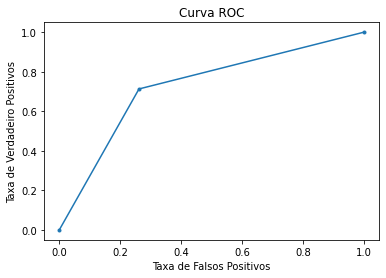

In [ ]:
#Criando curva ROC
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [ ]:
#Calculando área sob a curva
auc = roc_auc_score(y_test,classificacao)
round(auc,3)

0.726

**CONSIDERAÇÕES FINAIS:** COMPARANDO O DESEMPENHO DOS DOIS ALGORITMOS UTILIZADOS ATÉ AGORA PARA ESSE DATASET (ÁRVORE DE DECISÃO COM RANDOM FOREST NA ATIVIDADE ANTERIOR E REDES NEURAIS), PODEMOS CONCLUIR QUE EM AMBAS A TAXA DE APRENDIZADO NÃO FOI TÃO POSITIVA. DESDE A ANÁLISE PRELIMINAR É POSSÍVEL NOTAR QUE OS DADOS APRESENTAM BAIXA CORRELAÇÃO, TORNANDO DIFÍCIL DETERMINAR QUAIS PACIENTES APRESENTAM OU NÃO ALGUMA DOENÇA CARDIOVASCULAR. CONTUDO, A ACURÁCIA PARA REDES NEURAIS DEVERIA SEM MAIOR QUE 0.726.